# Figure 7g

## Install and read the R packages

In [ ]:
install.packages("data.table")
install.packages("wesanderson")
install.packages("ggrepel")
library(data.table)
library(tidyverse)
library(ggrepel)
library(wesanderson)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()



## Download and read the sliced Wasserstein kernel matrix in Figure 7g

In [ ]:
system("wget https://www.dropbox.com/s/keadf57l3s87k7o/fig7.zip")
system("unzip /content/fig7.zip")
K <- as.matrix(fread("/content/fig7/fig7_wasserstein_kernel_result.tsv",header=TRUE))

## Figure 7g

Too few points to calculate an ellipse

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


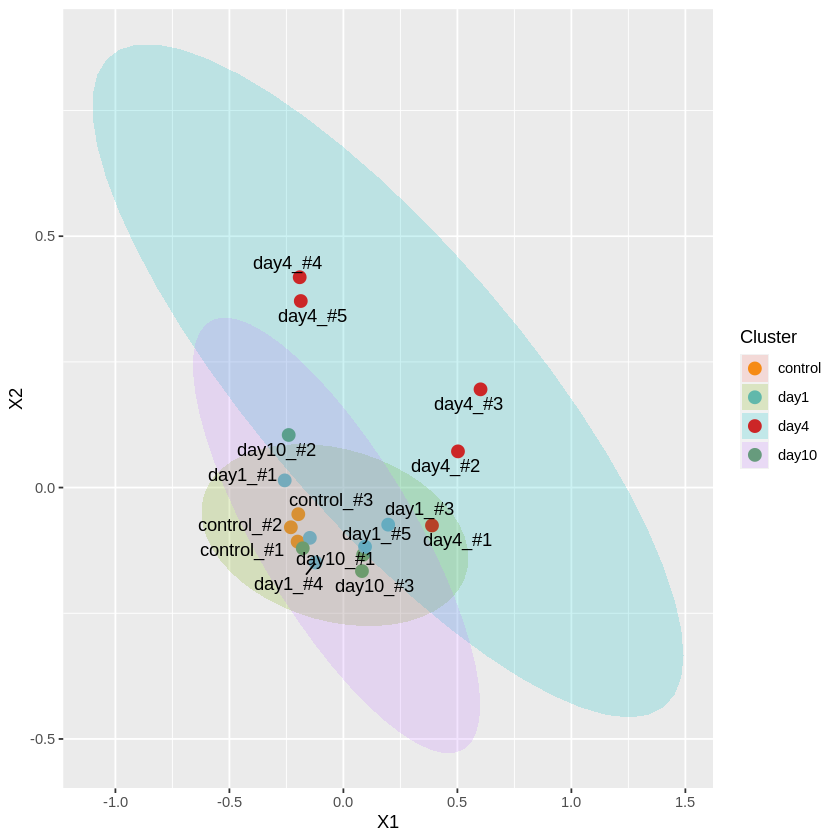

In [ ]:
obj <- cmdscale(dist(1-K))
day_id <- sapply(strsplit(colnames(K),"_"),function(x){x[1]})
filename <- colnames(K)
df <- data.frame(X1=obj[,1],X2=obj[,2],label=filename,cluster=factor(day_id,levels=c("control","day1","day4","day10")))
write.table(df,"fig7g.tsv",row.names=FALSE,col.names=TRUE,sep="\t",quote=FALSE)
color <- c("#F69100","#5BBCD6","#FF0000","#50A45C")
ggplot(df, aes(x = X1, y = X2, label = label)) +
  geom_point(aes(x=X1, y=X2, color=factor(cluster)), size=5, shape=20) +
  stat_ellipse(aes(x=X1,y=X2,fill=factor(cluster)),
               geom="polygon", level=0.95, alpha=0.2) +
               scale_color_manual(values = color) +
  geom_text_repel() + 
  guides(color=guide_legend("Cluster"),fill=guide_legend("Cluster")) +
  theme(plot.title = element_text(hjust = 0.5))